# Classifying Penguins with Keras

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from palmerpenguins import load_penguins

2024-05-06 08:31:39.675257: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [19]:
penguins = load_penguins()
penguins = penguins.sample(frac = 1)
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
334,Chinstrap,Dream,50.2,18.8,202.0,3800.0,male,2009
171,Gentoo,Biscoe,48.7,15.1,222.0,5350.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
306,Chinstrap,Dream,40.9,16.6,187.0,3200.0,female,2008
244,Gentoo,Biscoe,45.5,14.5,212.0,4750.0,female,2009
...,...,...,...,...,...,...,...,...
212,Gentoo,Biscoe,45.3,13.8,208.0,4200.0,female,2008
159,Gentoo,Biscoe,46.7,15.3,219.0,5200.0,male,2007
151,Adelie,Dream,41.5,18.5,201.0,4000.0,male,2009
68,Adelie,Torgersen,35.9,16.6,190.0,3050.0,female,2008


In [20]:
penguins_x = pd.concat([penguins[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']], pd.get_dummies(penguins['sex'])], axis = 1)
penguins_x = penguins_x[['body_mass_g', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'male', 'female']]
penguins_x


,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm,male,female
334,3800.0,50.2,18.8,202.0,1,0
171,5350.0,48.7,15.1,222.0,1,0
6,3625.0,38.9,17.8,181.0,0,1
306,3200.0,40.9,16.6,187.0,0,1
244,4750.0,45.5,14.5,212.0,0,1
...,...,...,...,...,...,...
212,4200.0,45.3,13.8,208.0,0,1
159,5200.0,46.7,15.3,219.0,1,0
151,4000.0,41.5,18.5,201.0,1,0
68,3050.0,35.9,16.6,190.0,0,1


In [21]:
x = penguins_x.values
min_max_scaler = preprocessing.MinMaxScaler()
scaled_penguins_x = pd.DataFrame(min_max_scaler.fit_transform(x), columns=penguins_x.columns)
scaled_penguins_x

,body_mass_g,bill_length_mm,bill_depth_mm,flipper_length_mm,male,female
0,0.305556,0.658182,0.678571,0.508475,1.0,0.0
1,0.736111,0.603636,0.238095,0.847458,1.0,0.0
2,0.256944,0.247273,0.559524,0.152542,0.0,1.0
3,0.138889,0.320000,0.416667,0.254237,0.0,1.0
4,0.569444,0.487273,0.166667,0.677966,0.0,1.0
...,...,...,...,...,...,...
328,0.416667,0.480000,0.083333,0.610169,0.0,1.0
329,0.694444,0.530909,0.261905,0.796610,1.0,0.0
330,0.361111,0.341818,0.642857,0.491525,1.0,0.0
331,0.097222,0.138182,0.416667,0.305085,0.0,1.0


In [22]:
penguins_y = penguins['species']
print(penguins_y)
penguins_y = penguins_y.astype('category').cat.codes.to_numpy()
penguins_y

334    Chinstrap
171       Gentoo
6         Adelie
306    Chinstrap
244       Gentoo
         ...    
212       Gentoo
159       Gentoo
151       Adelie
68        Adelie
129       Adelie
Name: species, Length: 333, dtype: object


array([1, 2, 0, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1,
       1, 1, 1, 0, 2, 0, 0, 0, 2, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 2, 0,
       2, 1, 0, 2, 0, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 1,
       0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 0,
       2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2, 2, 2, 0, 0, 2, 0, 1,
       2, 0, 2, 1, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0,
       2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 2,
       2, 1, 2, 0, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2,
       0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 0, 0, 0, 1, 1, 2,
       2, 2, 1, 2, 2, 0, 1, 2, 2, 1, 2, 1, 0, 1, 2, 0, 0, 1, 0, 2, 2, 2,
       1, 1, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 2, 1, 2, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0,
       0, 2, 1, 1, 2, 1, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 1, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 2, 0, 0, 1, 2, 1, 0, 0, 0,

In [23]:
#construct the model
inputs = keras.Input(shape=(6,))
x = layers.Dense(7, activation = 'relu')(inputs)
x = layers.Dense(5, activation = 'relu')(x)
x = layers.Dense(3, activation = 'relu')(x)
outputs = layers.Dense(3, activation='sigmoid')(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="penguin_model")

In [24]:
model.summary()

Model: "penguin_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │            49 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │            18 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119 (476.00 B)

 Trainable params: 119 (476.00 B)

 Non-trainable params: 0 (0.00 B)

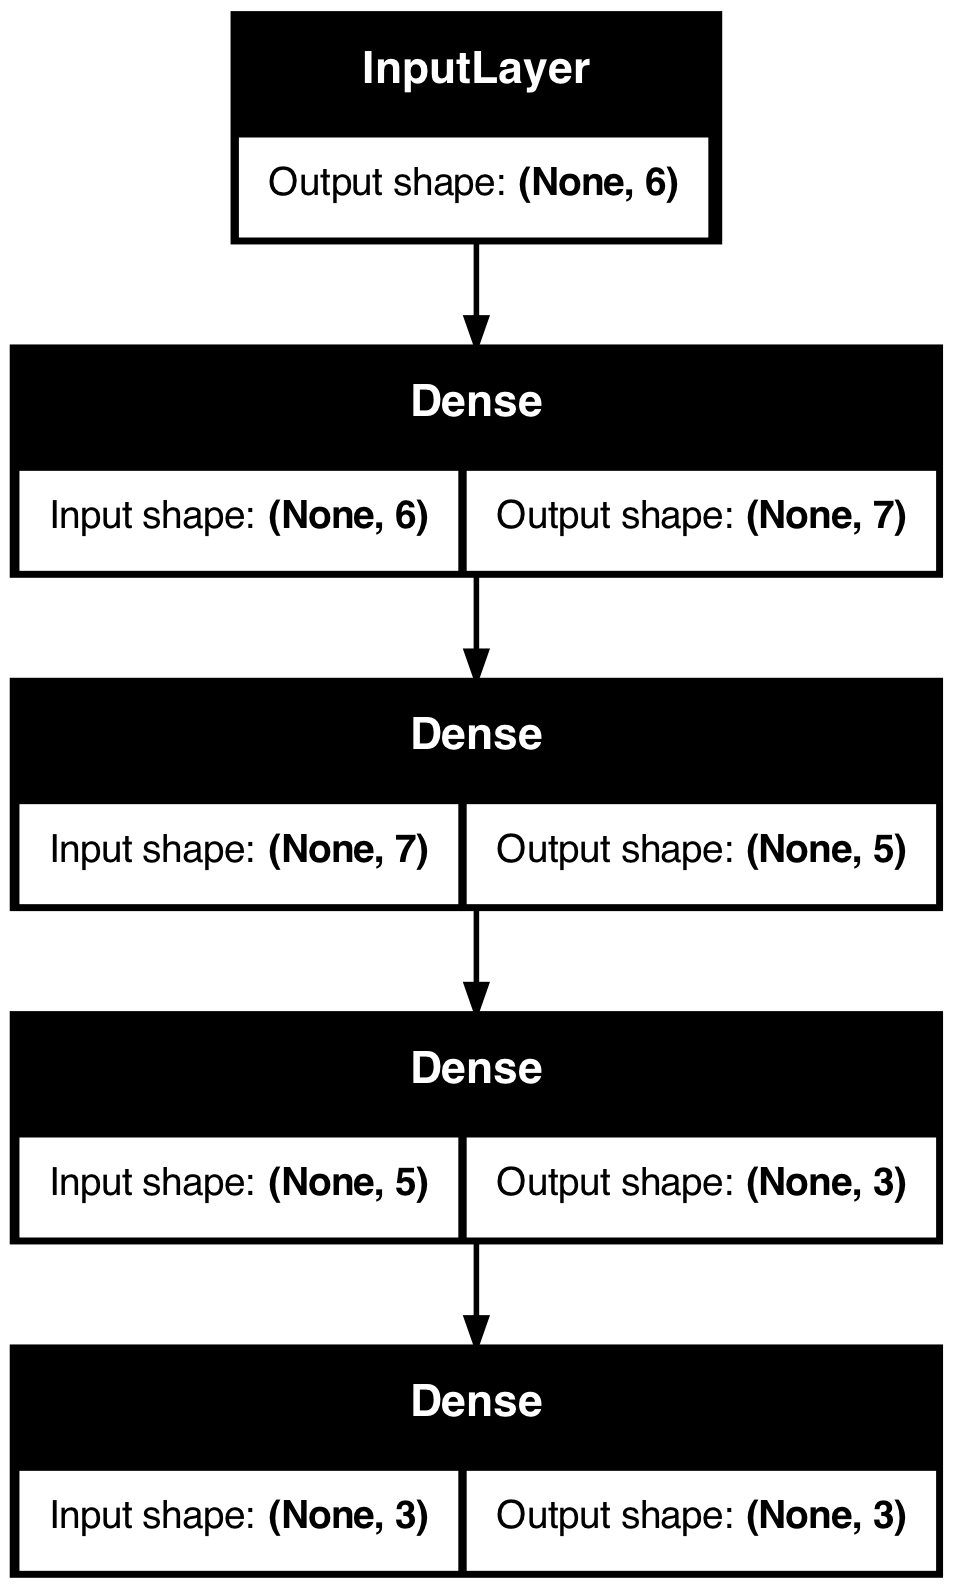

In [8]:
keras.utils.plot_model(model, show_shapes = True)

In [25]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(penguins_x, penguins_y, batch_size = 64, epochs=10, validation_split=0.1)

scores = model.evaluate(penguins_x, penguins_y, verbose=2)

Epoch 1/10


/Users/ben/anaconda3/lib/python3.11/site-packages/keras/src/backend/tensorflow/nn.py:602: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.3493 - loss: 219.1466 - val_accuracy: 0.3824 - val_loss: 190.4399
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3803 - loss: 179.0403 - val_accuracy: 0.3824 - val_loss: 169.0616
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3534 - loss: 177.2904 - val_accuracy: 0.3824 - val_loss: 151.9362
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3710 - loss: 148.8931 - val_accuracy: 0.3824 - val_loss: 136.0533
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3447 - loss: 135.9541 - val_accuracy: 0.3824 - val_loss: 121.8879
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3276 - loss: 123.8155 - val_accuracy: 0.3824 - val_loss: 108.5388
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3682 - loss: 103.7852 - val_accuracy: 0.3824 - val_loss: 95.6905
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3814 - loss: 91.4597 - val_accuracy: 0.3824 - val_los

In [29]:
model_scaled = keras.Model(inputs=inputs, outputs=outputs, name="penguin_model_scaled")

model_scaled.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history_scaled = model_scaled.fit(scaled_penguins_x, penguins_y, batch_size = 64, epochs = 10, validation_split = 0.1)

scores = model_scaled.evaluate(scaled_penguins_x, penguins_y, verbose = 2)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7580 - loss: 0.8161 - val_accuracy: 0.7941 - val_loss: 0.8076
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7866 - loss: 0.7903 - val_accuracy: 0.7941 - val_loss: 0.7964
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7738 - loss: 0.7985 - val_accuracy: 0.7941 - val_loss: 0.7866
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7793 - loss: 0.7919 - val_accuracy: 0.7941 - val_loss: 0.7775
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7745 - loss: 0.7745 - val_accuracy: 0.7941 - val_loss: 0.7690
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7777 - loss: 0.7739 - val_accuracy: 0.7941 - val_loss: 0.7607
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7667 - loss: 0.7638 - val_accuracy: 0.7941 - val_loss: 0.7523
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7978 - loss: 0.7422 - val_accuracy: 0.7941 - val_loss: 0.7452
Epoch 9

[0.7301896214485168, 0.7837837934494019]